Very similar to k-means in practice

Strategies:
- Agglomerative (bottom-up)
- Divisive (divise 1 big cluster)

Agglomerative (most common): 
 1. Make each data point a signle-point cluster --> N clusters
 2. Take the 2 closest clusters and maken them one cluster --> N-1 clusters
 3. REPEAT
--> how to measure the "closest clusters"
    - Closest points
    - Furthest points
    - Average distance
    - Distance between centroids
   
Dendograms:
    The algorithm stores the process of combining the individual points to a large cluster (all steps).
    This can be shown in a dendogram. 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<IPython.core.display.Javascript object>


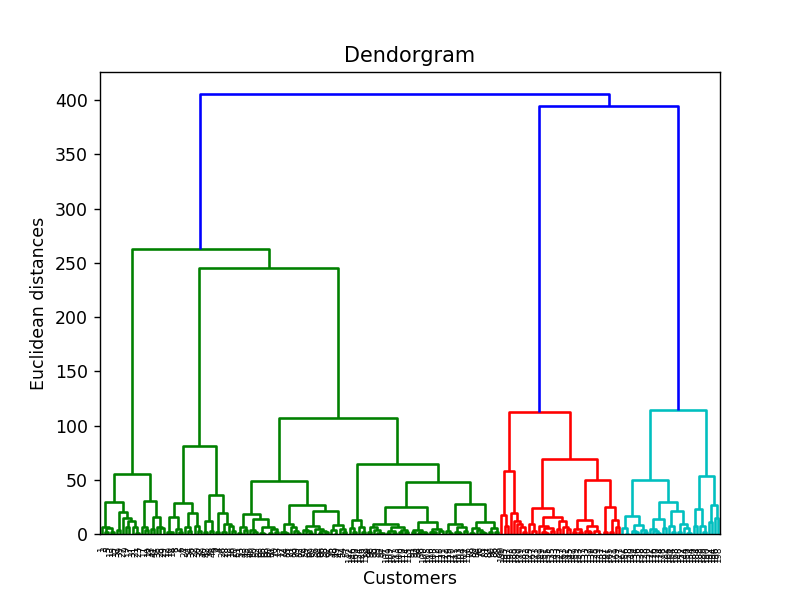

In [14]:
# Hierarchical Clustering

#libraries
%matplotlib notebook   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# - Set path - 
#convert to raw string and add an extra \ to the end (not to escape the string)
dir = (r'C:\Users\msfernandez\Machine Learning A-Z\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 25 - Hierarchical Clustering\\')
os.chdir(dir)

# - - - - - - - - - - - -
# - import the dataset - 
# - - - - - - - - - - - -
dataset = pd.read_csv('Mall_Customers.csv')
display(dataset.head())

X = dataset.iloc[:, [3,4]].values

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #'ward' method tries to minimise the within cluster variance

plt.title('Dendorgram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

<IPython.core.display.Javascript object>


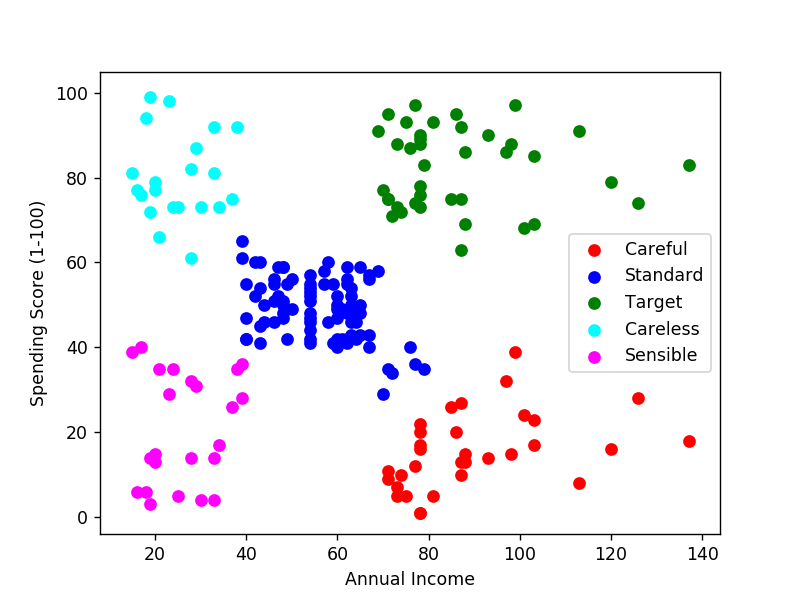

In [18]:
#Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

%matplotlib notebook
# Visualisation
plt.scatter(X[y_hc == 0, 0], X[y_hc ==0, 1], s=40, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc ==1, 1], s=40, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc ==2, 1], s=40, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc ==3, 1], s=40, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc ==4, 1], s=40, c = 'magenta', label = 'Sensible')
#plt.scatter(y_hc.cluster_centers_[:,0], y_hc.cluster_centers_[:,1], s=150, c='yellow', label = 'Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
fig2.show()